In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline

In [4]:
#immporting the dataset from scikit learn
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [7]:
#assigning the column names as features
boston_x = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
#setting the median value as the target
boston['MEDV'] = boston_dataset.target
boston_y = boston['MEDV']
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

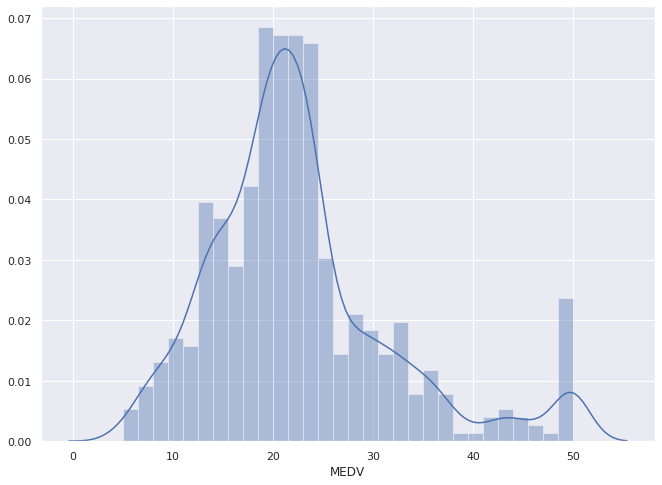

In [9]:
#plotting the distribution of the target variable boston_y
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

In [10]:
boston_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


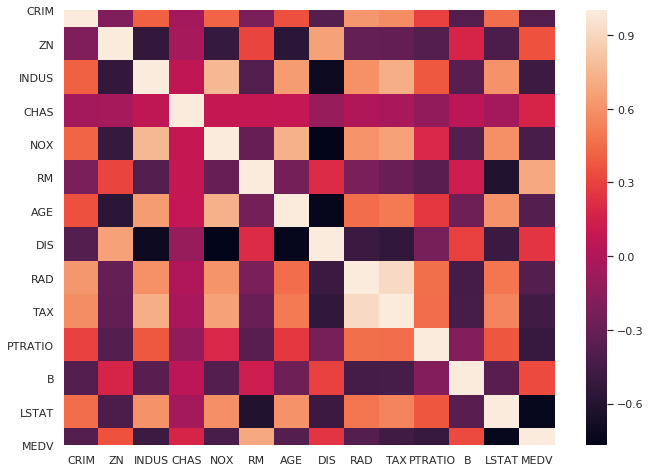

In [11]:
#exploratory data analysis
#plotting the correlation heatmap of the boston dataset
boston_cor = boston.corr()
correlation_heatmap = sns.heatmap(boston_cor)

In [12]:
#creating and traing the model
from sklearn import linear_model
from sklearn.model_selection import train_test_split
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(boston_x, boston_y, test_size = 0.2, random_state = 4)
reg.fit(x_train, y_train)

LinearRegression()

In [13]:
#regression coefficent
reg.coef_

array([-1.15966452e-01,  4.71249231e-02,  8.25980146e-03,  3.23404531e+00,
       -1.66865890e+01,  3.88410651e+00, -1.08974442e-02, -1.54129540e+00,
        2.93208309e-01, -1.34059383e-02, -9.06296429e-01,  8.80823439e-03,
       -4.57723846e-01])

In [14]:
n = reg.predict(x_test)
n[4]

36.92091658813793

In [15]:
print(y_test)

8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
       ... 
368    50.0
144    11.8
336    19.5
437     8.7
216    23.3
Name: MEDV, Length: 102, dtype: float64


In [17]:
#calculating the ,ean squarred error
mean_error = np.mean((n-y_test)**2)
print(mean_error)

25.41958712682191
